In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('cleaned_anime.csv')

# Визуализация
**Что было бы интересно узнать?**
 - Распределение по жанрам(сколько всего записей для каждого жанра существует)
 - Серии с наибольшим числом сезонов(в каких сериях больше всего сезонов(можно считать от 2х)
 - Какой временной промежуток представлен, временной ряд с числом аниме (с учетом сезонов) ✔
 - Распределение по рейтингам (в каком промежутке рейтинга находится большее число аниме) ✔
 - Распределение по студиям (отношение студии и числа выпущенных аниме) ✔
 - Какие жанры преобладают в более популярных аниме?


In [29]:
sns.set()
#sns.set_palette("Paired")
sns.set_palette("pastel")

In [30]:
data

,Page,Rus_name,Eng_name,Href,Genres,Rating,Description,Alt_description,Img,Minor_names,Studio,Season,Year,Season_name,Seria_name
0,1,Стальной алхимик: Братство,Hagane no Renkinjutsushi (2009) / FMA (2009),/catalog/hagane-no-renkinjutsushi-2009-2400,"['Экшен', 'Военное', 'Приключения', 'Комедия',...",9.2,Ремейк одноимённого аниме-сериала «Стальной ал...,Нарушив главный запрет Алхимии и попытавшись в...,/posters/2400.10127424713.jpg,"['Стальной алхимик: Братство ', ' Hagane no Re...",Bones,весеннем,2009.0,Братство,Стальной алхимик
1,1,Врата Штейна,Steins;Gate,/catalog/steins-gate-914,"['Фантастика', 'Триллер']",9.1,Действие сериала происходит летом 2010 года в ...,"Акихабара – интереснейшее место, где обитают с...",/posters/914.11477207553.jpg,"['Врата Штейна ', ' シュタインズ・ゲート ', ' Steins Gat...",White Fox,весеннем,2011.0,NaN,Врата Штейна
2,1,Гинтама 4 сезон,Gintama°,/catalog/gintama-9815,"['Экшен', 'Комедия', 'Исторический', 'Пародия'...",9.1,"Никто этого уже не ждал и не надеялся, но...\n...",NaN,/posters/9815.35700322133.jpg,"['Gintama° ', ' Гинтама 4 ', ' Gintama (2015) ...",Bandai Namco Pictures,весеннем,2015.0,4,Гинтама
3,1,Охотник х Охотник (2011),Hunter x Hunter (2011),/catalog/hunter-x-hunter-2011-4023,"['Экшен', 'Приключения', 'Сёнен', 'Супер сила'...",9.1,Ремейк аниме-сериала «Охотник х Охотник» 1999 ...,"Жизнь в этой реальности устроена, как обычно –...",/posters/4023.9592776303.jpg,"['Hunter x Hunter (2011) ', ' Охотник х Охотни...",Madhouse Studios,осеннем,2011.0,NaN,Охотник х Охотник (2011)
4,1,Гинтама 2 сезон,Gintama',/catalog/gintama-216,"['Экшен', 'Комедия', 'Исторический', 'Пародия'...",9.1,"Над древним Эдо, которым правит марионеточный ...",Продолжение приключений Гинтоки и его команды ...,/posters/216.40890160023.jpg,"['Гинтама 2 ', "" Gintama' "", ' Gintama` ', ' 銀...",Sunrise,весеннем,2011.0,2,Гинтама
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,80,АКБ0048,AKB0048,/catalog/akb0048-493,"['Музыка', 'Фантастика']",7.4,В начале 21 века Мировая война достигает своег...,После очередной мировой войны человечество пот...,/posters/493.28311515333.jpg,"['АКБ0048 ', ' AKB0048 ', ' AKB0048: First Sta...",Satelight,весеннем,2012.0,NaN,АКБ0048
1913,80,Остров Забвения: Харука и волшебное зеркало,Hottarake no Shima: Haruka to Mahou no Kagami,/catalog/hottarake-no-shima-haruka-to-mahou-no...,['Фэнтези'],7.4,"Твой любимый плюшевый мишка. Старая, так и не ...",16-летняя Харука в раннем детстве потеряла мат...,/posters/722.582107413.jpg,['Hottarake no Shima: Haruka to Mahou no Kagam...,"Production I.G, Polygon Pictures",летнем,2009.0,Харука и волшебное зеркало,Остров Забвения
1914,80,Чей-то взгляд,Dareka no Manazashi,/catalog/dareka-no-manazashi-1112,"['Драма', 'Повседневность']",7.4,Со временем вещи становятся обыденными и скучн...,NaN,/posters/1112.22266925323.jpg,"['Чей-то взгляд ', ' Dareka no Manazashi ', ' ...",CoMix Wave,зимнем,2013.0,NaN,Чей-то взгляд
1915,80,Трусливый велосипедист: Специальная поездка,Yowamushi Pedal: Special Ride,/catalog/yowamushi-pedal-special-ride-1851,"['Комедия', 'Драма', 'Сёнен', 'Спорт']",7.4,"Сакамичи Онода — отаку, мечтающий найти друзей...",NaN,/posters/1851.491422403.jpg,"['Yowamushi Pedal: Special Ride ', ' Трусливый...",TMS Entertainment,летнем,2013.0,Специальная поездка,Трусливый велосипедист


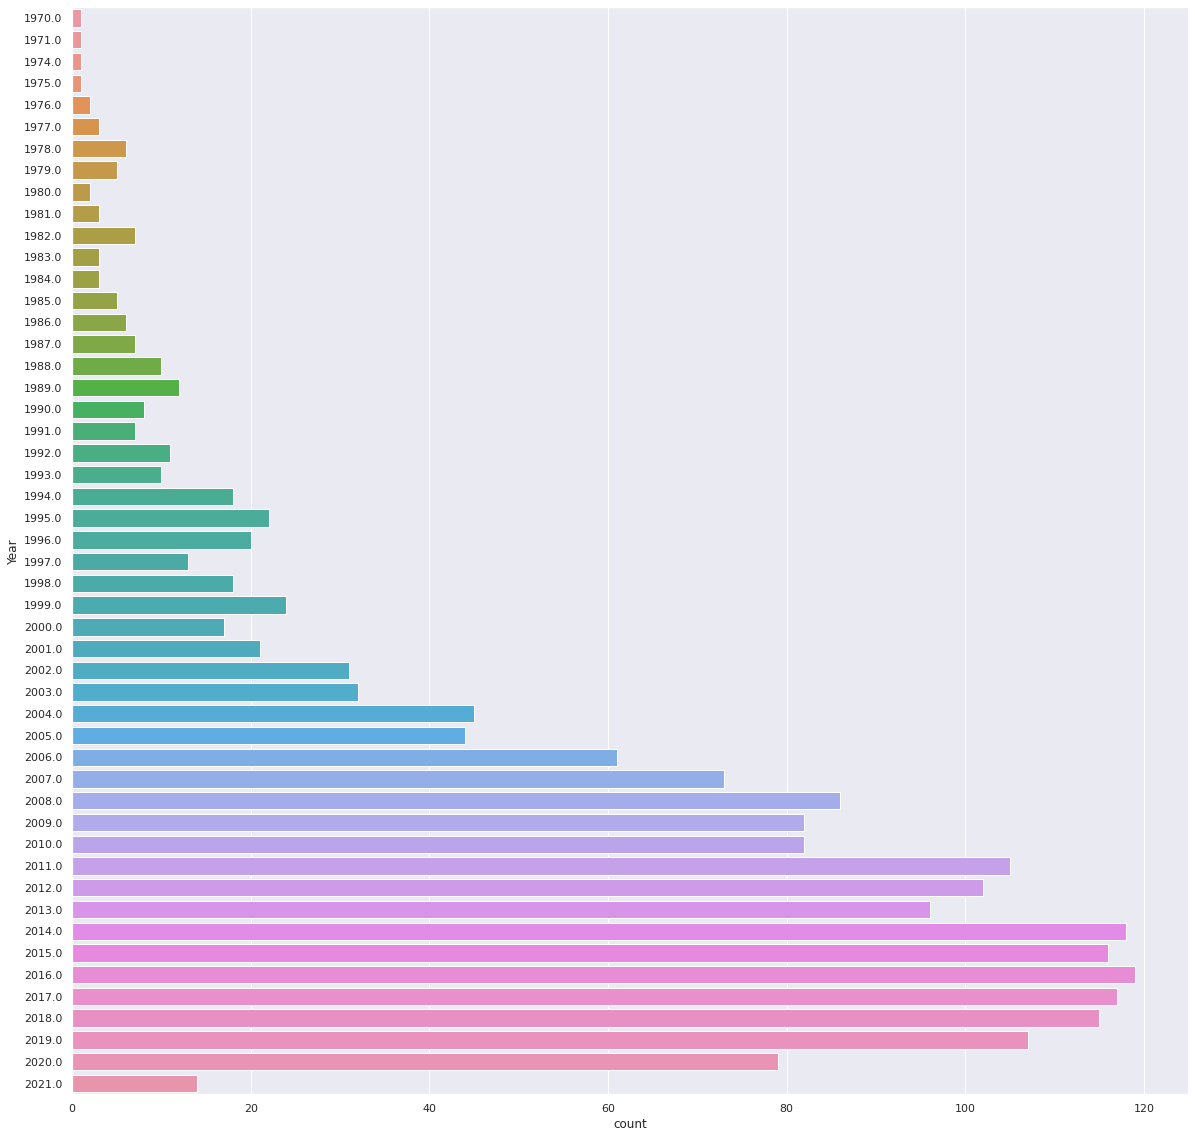

In [31]:
#Распределение по годам
pd.to_numeric(data.Year, downcast='integer')

f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(y="Year", data=data)

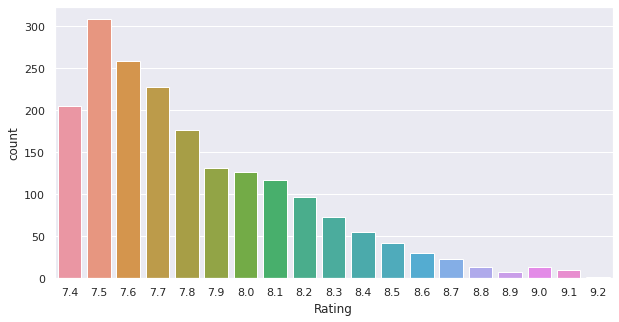

In [32]:
#Распределение по рейтингу
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Rating", data=data)

In [33]:
#Распределение по студиям
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#studio_df = data.Studio.value_counts()
#plot = studio_df.plot.pie(y='vals', figsize=(10, 10), autopct="%.1f%%")

In [34]:
unic_studios = {}
for studios in data.Studio:
    
        if type(studios) == float and pd.isna(studios):
            continue
            
        for studio in studios.split(', '):
            unic_studios[studio] = 1 if studio not in unic_studios else nic_studios[studio]+1

In [35]:
unic_studios = sorted(unic_studios.items(), key=lambda x: x[1])
unic_studios

[('Studio Bind', 1),
 ('Studio Signpost', 1),
 ('IMAGIN', 1),
 ('Bibury Animation Studios', 1),
 ('Toei Animation.', 1),
 ('Oh! Production', 1),
 ('Nippon Ramayana Film Co.', 1),
 ('Colored-Pencil Animation Design', 1),
 ('Studio Junio', 1),
 ('Nice Boat Animation', 1),
 ('Samsara Animation Studio', 1),
 ('Radix', 1),
 ('Encourage Films', 1),
 ('SamBakZa', 1),
 ('Production IMS', 1),
 ('NAZ', 1),
 ('BeSTACK', 1),
 ('Ascension', 1),
 ('Anpro', 1),
 ('Phoenix Entertainment', 1),
 ('Djinn Power', 1),
 ('Carp Studio', 1),
 ('Sony Music Entertainment', 1),
 ('Marza Animation Planet', 1),
 ('DMM.futureworks', 1),
 ('L²Studio', 1),
 ('SME Visual Works', 1),
 ('Nakamura Production', 1),
 ('Bee Media', 1),
 ('CODE', 1),
 ('Visual 80', 1),
 ('Palm Studio', 1),
 ('Hoods Entertainment', 1),
 ('dwarf', 1),
 ('Ezόla', 1),
 ('AIC Spirits', 1),
 ('Xebec Zwei', 1),
 ('Odolttogi', 1),
 ('Kadokawa', 1),
 ('Yaoyorozu', 1),
 ('GRIZZLY', 1),
 ('Sunrise Beyond', 1),
 ('The Answer Studio', 1),
 ('Lapin Track'

In [36]:
studio_data = pd.DataFrame(list(unic_studios) ,columns = ['Studio','Frequency']) 

In [38]:
studio_data.head()
studios = studio_data.drop(columns='Frequency')
studios = studios.rename(columns = {'Studio': 'name'}, inplace = False)

In [39]:
studios.head()

,name
0,Studio Bind
1,Studio Signpost
2,IMAGIN
3,Bibury Animation Studios
4,Toei Animation.


In [40]:
studios.to_csv('studios.csv', index=False, encoding='utf-8')

In [41]:
sns.set(font_scale=2)  

9.75943396226415


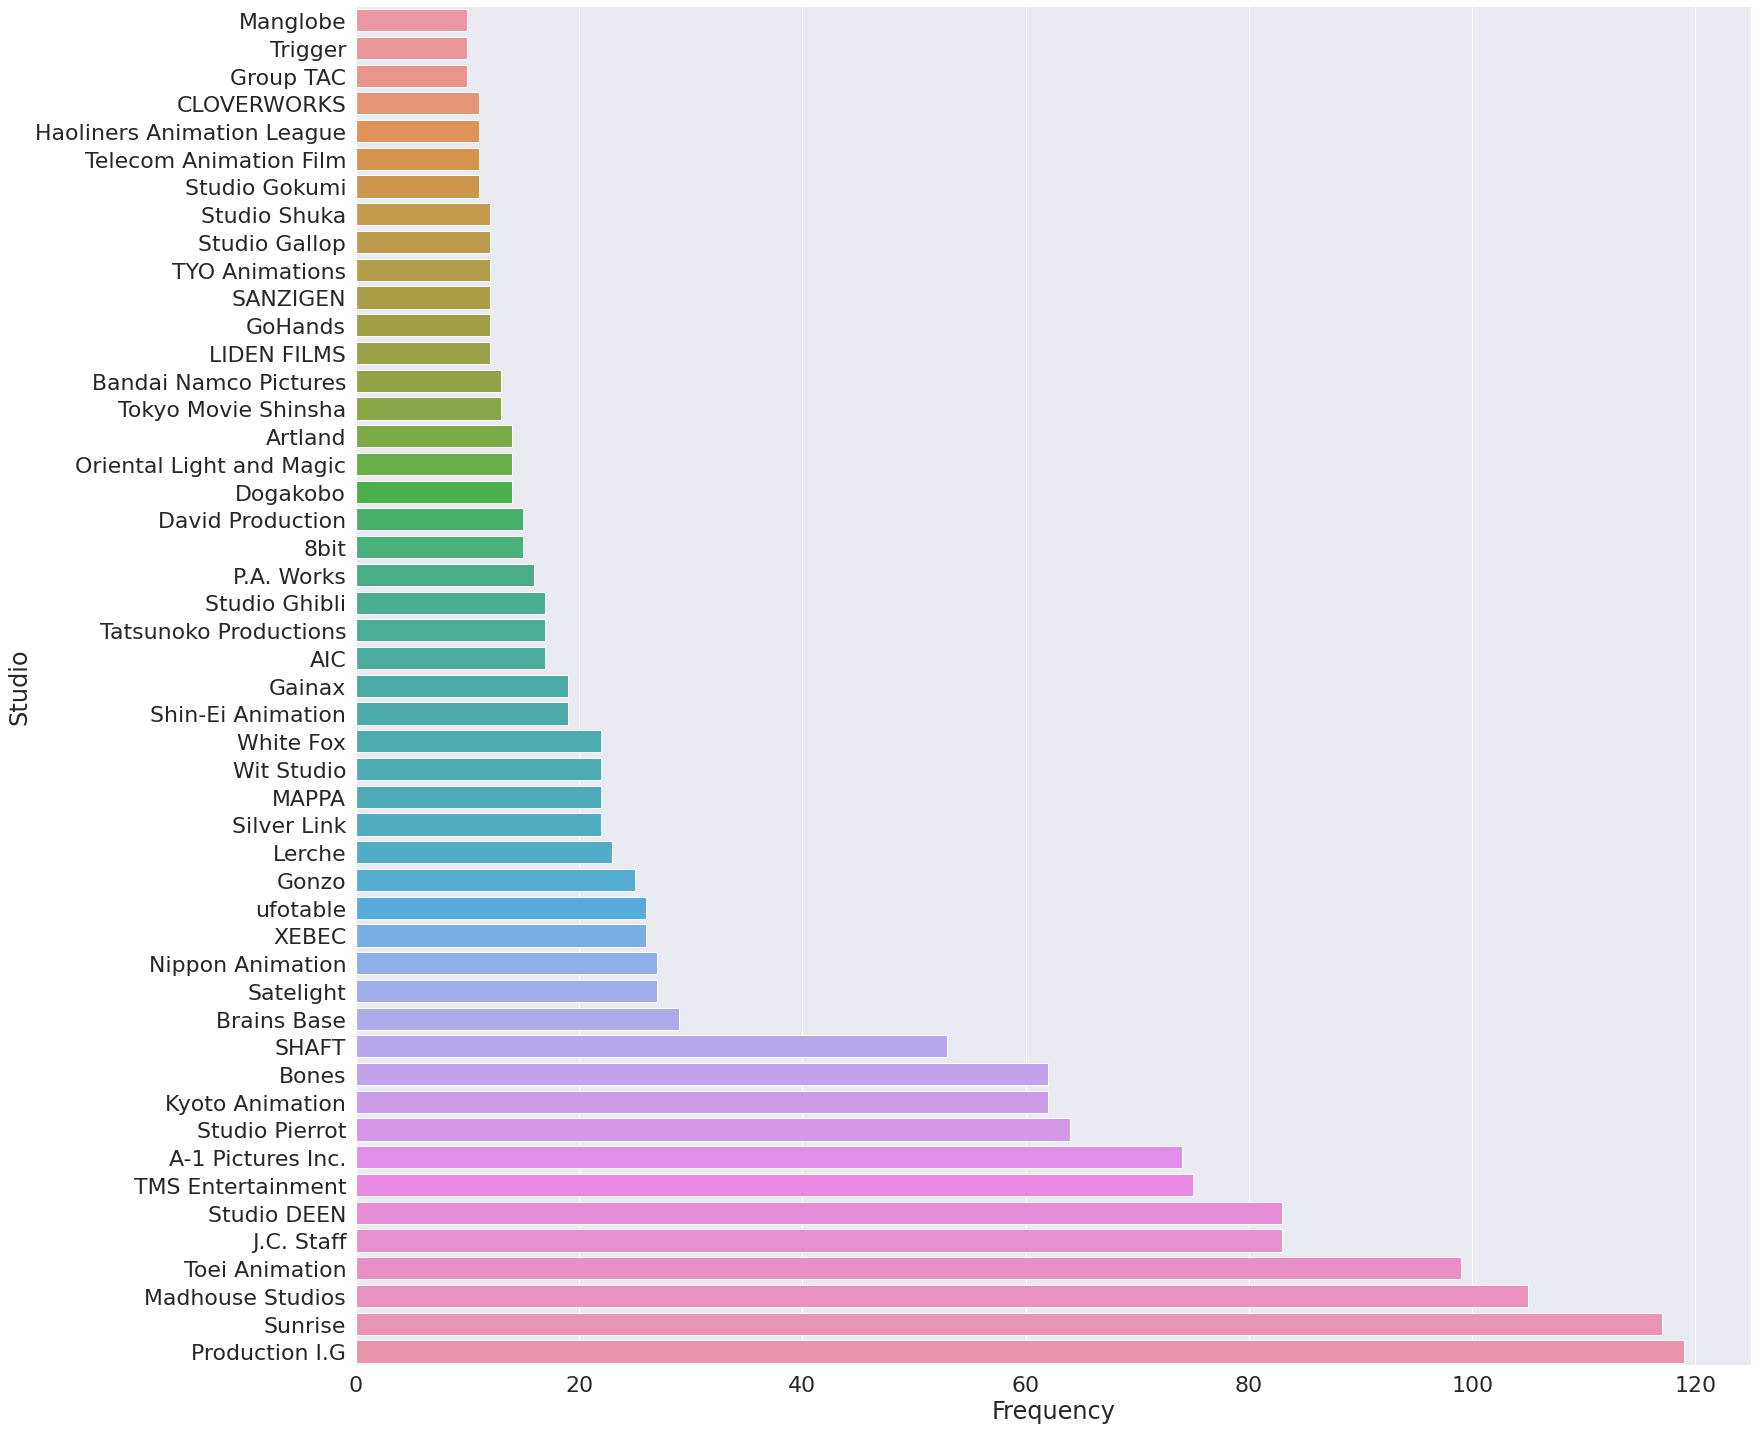

In [42]:
#f, ax = plt.subplots(figsize=(10,60))
#sns.countplot(y="Studio", data=studio_data)
f, ax = plt.subplots(figsize=(25,25))


mean = np.mean(studio_data.Frequency) 
print(mean)
sub =  studio_data[studio_data.Frequency > mean]
sns.barplot(x = sub.Frequency, y = sub.Studio)